<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793038-Jonathan_Garza/blob/main/Actividades%20Semana%208/Actividad_de_semana_8_Regresion_lineal_polinomial_Jonathan_Garza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instituto Tecnológico y de Estudios Superiores de Monterrey**

Maestría en Inteligencia Artificial Aplicada (MNA)

Ciencia y Analítica de Datos

**Actividad de Semana 8: Regresión Lineal y Polinomial**

**Jonathan Garza Bennet - A01793038**

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [270]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [271]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [272]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

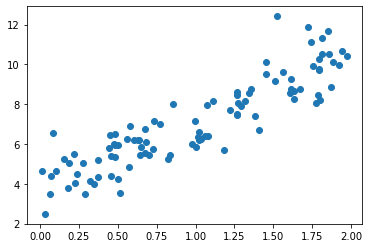

In [273]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [274]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [275]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [276]:
#X_fit[]

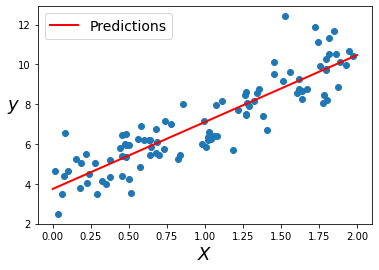

In [277]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [278]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [279]:
X_new.shape

(2, 1)

In [280]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [281]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [282]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [283]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

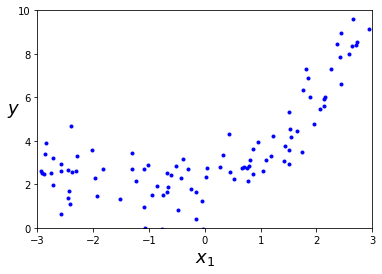

In [284]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [285]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [286]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [287]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [288]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [289]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [290]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

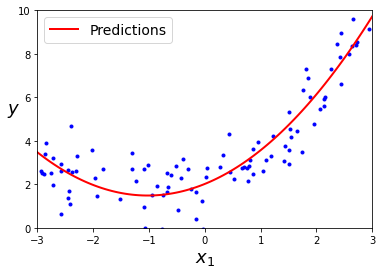

In [291]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [292]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [293]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [294]:
len(X)

1000

In [295]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

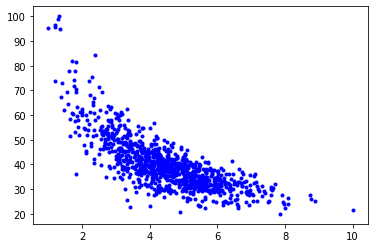

In [296]:
plt.plot(X,y,'b.')

In [297]:
#Librerías a utilizar
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

**Divide los datos del costo de manufactura. Utiliza la función train_test_split.**

In [298]:
#Se realiza una división del conjunto de entrenamiento y prueba del 80% y 20% y semilla 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Se imprimen los resultados de los conjuntos realizados para verificar
print(' La forma de X es: {}'.format(X.shape)+'\n', 
      'La forma de y es: {}'.format(y.shape)+'\n',
      'La forma de X_train es: {}'.format(X_train.shape)+'\n', 'La forma de X_train es: {}'.format(X_train.shape)+'\n', 
      'La forma de y_train es: {}'.format(y_train.shape)+'\n', 'La forma de y_train es: {}'.format(y_train.shape)+'\n',
      'La forma de X_test es: {}'.format(X_test.shape)+'\n', 'La forma de X_test es: {}'.format(X_test.shape)+'\n', 
      'La forma de y_test es: {}'.format(y_test.shape)+'\n', 'La forma de y_test es: {}'.format(y_test.shape)+'\n')

 La forma de X es: (1000, 1)
 La forma de y es: (1000,)
 La forma de X_train es: (800, 1)
 La forma de X_train es: (800, 1)
 La forma de y_train es: (800,)
 La forma de y_train es: (800,)
 La forma de X_test es: (200, 1)
 La forma de X_test es: (200, 1)
 La forma de y_test es: (200,)
 La forma de y_test es: (200,)



**Regresión Lineal:**

Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

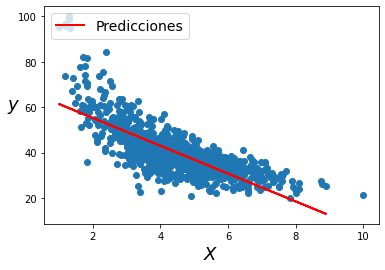

Error medio Absoluto del Conjunto de Entrenamiento es (MAE): 4.945478137356366
Root Mean Squared Error del Conjunto de Entrenamiento es: 6.834772415313126
r2_score del Conjunto de Entrenamiento es: 0.5836439303438314
Error medio Absoluto del Conjunto de Prueba es (MAE): 4.8901661963170975
Root Mean Squared Error del Conjunto de Prueba es: 7.023460530219433
r2_score del Conjunto de Prueba es: 0.5526895076238993
La ecuación resultante es:
y = x*(-6.123962526222854)+67.51699929483895


In [299]:
#lineal

#Se crean listas vacías para guardar la información

nombres_modelos =[]
MAE_Modelos = []
RMSE_Modelos = []
r2_score_Modelos =[]

#Se define modelo y se asigna a un objeto
LR = LinearRegression(fit_intercept=True)

#Se ajusta el modelo
LR.fit(X_train, y_train)

# construct best fit line
X_fit = X_train
y_fit = LR.predict(X_fit)

#Se imprime la gráfica
plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);
plt.show()

#Se realizan las predicciones en el conjunto de entrenamiento y prueba
y_pred_train = LR.predict(X_train)
y_pred_test = LR.predict(X_test)

#Se calculan Métricas
MAE = mean_absolute_error(y_test, y_pred_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2score = r2_score(y_test, y_pred_test)

#Se guardan métricas de interés
nombres_modelos.append('LR')
MAE_Modelos.append(MAE)
RMSE_Modelos.append(RMSE)
r2_score_Modelos.append(r2score)


#Se imprimen las métricas de interés

print('Error medio Absoluto del Conjunto de Entrenamiento es (MAE):', mean_absolute_error(y_train, y_pred_train))
print('Root Mean Squared Error del Conjunto de Entrenamiento es:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('r2_score del Conjunto de Entrenamiento es:',r2_score(y_train, y_pred_train))

print('Error medio Absoluto del Conjunto de Prueba es (MAE):', mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared Error del Conjunto de Prueba es:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('r2_score del Conjunto de Prueba es:',r2_score(y_test, y_pred_test))

#Ecuación Resultante
print('La ecuación resultante es:\ny = x*({})'.format(LR.coef_[0])+'+{}'.format(LR.intercept_))

**Regresión Polinomial**

Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

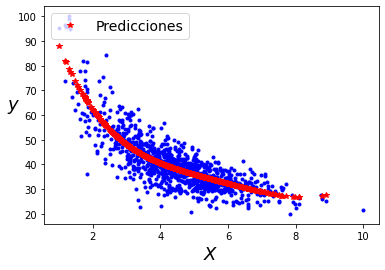

Error medio Absoluto del Conjunto de Entrenamiento es (MAE): 4.489009440750899
Root Mean Squared Error del Conjunto de Entrenamiento es: 5.9379243491117215
r2_score del Conjunto de Entrenamiento es: 0.6857421718444109
Error medio Absoluto del Conjunto de Prueba es (MAE): 4.2643785922455875
Root Mean Squared Error del Conjunto de Prueba es: 5.640947301453971
r2_score del Conjunto de Prueba es: 0.7114567773088344
La ecuación resultante es:
y = x^4*(0.05994368520476101)+x^3*(-1.4227535891090273)+x^2*(12.762145040349349)+x*(-54.792684820518986)+131.2386382504135


In [300]:
#polinomial

#Se crea pipeline con transformación de los datos de entrada a polinomio de grado 2
polypipe = Pipeline([("polynomial_features", PolynomialFeatures(degree=4, include_bias=False)),
                  ("LR", LinearRegression())])

#Se realizan transformaciones y se entrena el modelo
polypipe.fit(X_train, y_train)

# construct best fit line
X_fit = X_train
y_fit = polypipe.predict(X_fit)

#Se imprime la gráfica
plt.plot(X, y, "b.")
plt.plot(X_fit, y_fit, "r*", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);
plt.show()

#Se realizan las predicciones en el conjunto de entrenamiento y prueba
y_pred_train = polypipe.predict(X_train)
y_pred_test = polypipe.predict(X_test)

#Se calculan Métricas
MAE = mean_absolute_error(y_test, y_pred_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2score = r2_score(y_test, y_pred_test)

#Se guardan métricas de interés
nombres_modelos.append('Poly')
MAE_Modelos.append(MAE)
RMSE_Modelos.append(RMSE)
r2_score_Modelos.append(r2score)

#Se imprimen las métricas de interés

print('Error medio Absoluto del Conjunto de Entrenamiento es (MAE):', mean_absolute_error(y_train, y_pred_train))
print('Root Mean Squared Error del Conjunto de Entrenamiento es:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('r2_score del Conjunto de Entrenamiento es:',r2_score(y_train, y_pred_train))

print('Error medio Absoluto del Conjunto de Prueba es (MAE):', mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared Error del Conjunto de Prueba es:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('r2_score del Conjunto de Prueba es:',r2_score(y_test, y_pred_test))

#Ecuación Resultante
print('La ecuación resultante es:\ny = x^4*({})+'.format(polypipe.named_steps['LR'].coef_[3])+
                                      'x^3*({})+'.format(polypipe.named_steps['LR'].coef_[2])+
                                      'x^2*({})+'.format(polypipe.named_steps['LR'].coef_[1])+
                                      'x*({})+'.format(polypipe.named_steps['LR'].coef_[0])+
                                        '{}'.format(polypipe.named_steps['LR'].intercept_))


**Realiza la regresión con Ridge y Lasso**

Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.269e+04, tolerance: 8.976e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


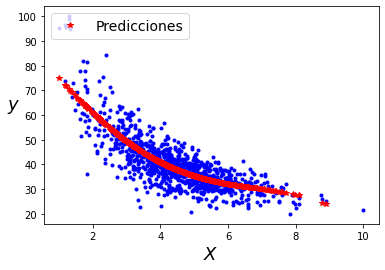

Error medio Absoluto del Conjunto de Entrenamiento es (MAE): 4.500418535710009
Root Mean Squared Error del Conjunto de Entrenamiento es: 6.063025318595666
r2_score del Conjunto de Entrenamiento es: 0.6723610330969251
Error medio Absoluto del Conjunto de Prueba es (MAE): 4.334850888548118
Root Mean Squared Error del Conjunto de Prueba es: 5.897727996805586
r2_score del Conjunto de Prueba es: 0.6845894097969198
La ecuación resultante es:
y = x^4*(-0.020156717812208052)+x^3*(0.2698274325312116)+x^2*(0.15756558651488184)+x*(-16.05531920702418)+90.53896286555887


In [301]:
#Lasso

#Se crea pipeline con transformación de los datos de entrada a polinomio de grado 2
polyLasso = Pipeline([("polynomial_features", PolynomialFeatures(degree=4, include_bias=False)),
                  ("Lasso", Lasso(alpha = 0.1))])

#Se realizan transformaciones y se entrena el modelo
polyLasso.fit(X_train, y_train)

# construct best fit line
X_fit = X_train
y_fit = polyLasso.predict(X_fit)

#Se imprime la gráfica
plt.plot(X, y, "b.")
plt.plot(X_fit, y_fit, "r*", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);
plt.show()

#Se realizan las predicciones en el conjunto de entrenamiento y prueba
y_pred_train = polyLasso.predict(X_train)
y_pred_test = polyLasso.predict(X_test)

#Se calculan Métricas
MAE = mean_absolute_error(y_test, y_pred_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2score = r2_score(y_test, y_pred_test)

#Se guardan métricas de interés
nombres_modelos.append('Lasso')
MAE_Modelos.append(MAE)
RMSE_Modelos.append(RMSE)
r2_score_Modelos.append(r2score)

#Se imprimen las métricas de interés

print('Error medio Absoluto del Conjunto de Entrenamiento es (MAE):', mean_absolute_error(y_train, y_pred_train))
print('Root Mean Squared Error del Conjunto de Entrenamiento es:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('r2_score del Conjunto de Entrenamiento es:',r2_score(y_train, y_pred_train))

print('Error medio Absoluto del Conjunto de Prueba es (MAE):', mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared Error del Conjunto de Prueba es:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('r2_score del Conjunto de Prueba es:',r2_score(y_test, y_pred_test))

#Ecuación Resultante
print('La ecuación resultante es:\ny = x^4*({})+'.format(polyLasso.named_steps['Lasso'].coef_[3])+
                                      'x^3*({})+'.format(polyLasso.named_steps['Lasso'].coef_[2])+
                                      'x^2*({})+'.format(polyLasso.named_steps['Lasso'].coef_[1])+
                                      'x*({})+'.format(polyLasso.named_steps['Lasso'].coef_[0])+
                                        '{}'.format(polyLasso.named_steps['Lasso'].intercept_))

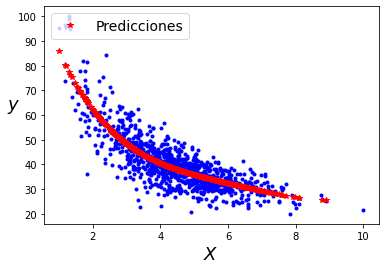

Error medio Absoluto del Conjunto de Entrenamiento es (MAE): 4.483345996241875
Root Mean Squared Error del Conjunto de Entrenamiento es: 5.941997391355238
r2_score del Conjunto de Entrenamiento es: 0.6853109018150696
Error medio Absoluto del Conjunto de Prueba es (MAE): 4.243257435474305
Root Mean Squared Error del Conjunto de Prueba es: 5.603422674169347
r2_score del Conjunto de Prueba es: 0.7152828948449339
La ecuación resultante es:
y = x^4*(0.04079618249443758)+x^3*(-1.041619743117002)+x^2*(10.100889113775425)+x*(-47.16346211399777)+123.80683918418042


In [302]:
#Ridge

#Se crea pipeline con transformación de los datos de entrada a polinomio de grado 2
polyRidge = Pipeline([("polynomial_features", PolynomialFeatures(degree=4, include_bias=False)),
                  ("Ridge", Ridge(alpha = 0.1))])

#Se realizan transformaciones y se entrena el modelo
polyRidge.fit(X_train, y_train)

# construct best fit line
X_fit = X_train
y_fit = polyRidge.predict(X_fit)

#Se imprime la gráfica
plt.plot(X, y, "b.")
plt.plot(X_fit, y_fit, "r*", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);
plt.show()

#Se realizan las predicciones en el conjunto de entrenamiento y prueba
y_pred_train = polyRidge.predict(X_train)
y_pred_test = polyRidge.predict(X_test)

#Se calculan Métricas
MAE = mean_absolute_error(y_test, y_pred_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2score = r2_score(y_test, y_pred_test)

#Se guardan métricas de interés
nombres_modelos.append('Ridge')
MAE_Modelos.append(MAE)
RMSE_Modelos.append(RMSE)
r2_score_Modelos.append(r2score)

#Se imprimen las métricas de interés

print('Error medio Absoluto del Conjunto de Entrenamiento es (MAE):', mean_absolute_error(y_train, y_pred_train))
print('Root Mean Squared Error del Conjunto de Entrenamiento es:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('r2_score del Conjunto de Entrenamiento es:',r2_score(y_train, y_pred_train))

print('Error medio Absoluto del Conjunto de Prueba es (MAE):', mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared Error del Conjunto de Prueba es:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('r2_score del Conjunto de Prueba es:',r2_score(y_test, y_pred_test))

#Ecuación Resultante
print('La ecuación resultante es:\ny = x^4*({})+'.format(polyRidge.named_steps['Ridge'].coef_[3])+
                                      'x^3*({})+'.format(polyRidge.named_steps['Ridge'].coef_[2])+
                                      'x^2*({})+'.format(polyRidge.named_steps['Ridge'].coef_[1])+
                                      'x*({})+'.format(polyRidge.named_steps['Ridge'].coef_[0])+
                                        '{}'.format(polyRidge.named_steps['Ridge'].intercept_))

**Se grafican métricas**

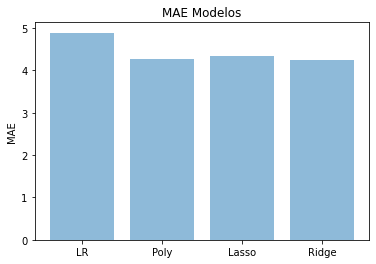

In [303]:
objects = nombres_modelos
y_pos = np.arange(len(objects))
performance = MAE_Modelos

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('MAE')
plt.title('MAE Modelos')

plt.show()

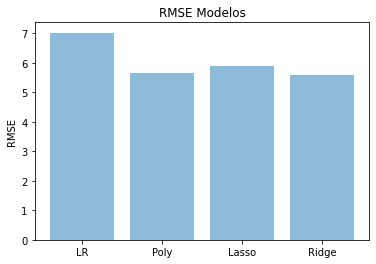

In [304]:
objects = nombres_modelos
y_pos = np.arange(len(objects))
performance = RMSE_Modelos

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('RMSE')
plt.title('RMSE Modelos')

plt.show()

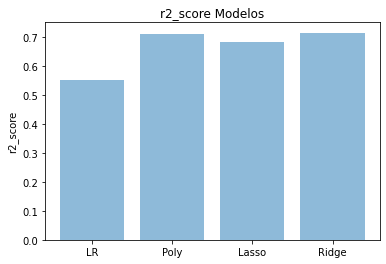

In [305]:
objects = nombres_modelos
y_pos = np.arange(len(objects))
performance = r2_score_Modelos

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('r2_score')
plt.title('r2_score Modelos')

plt.show()

**Explica tus resultados**

***¿que método conviene más a la empresa? ¿por que?***

El método Ridge aplicado a un polinomio de grado 4 regresa los valores más altos de r2_score y los errores MAE y RMSE más bajos, lo que representa la mejor correlación y por lo tanto se sugiere como mejor modelo.

***¿que porcentajes de entrenamiento y evaluación usaste?***

Se utilizó un porcenaje de entrenamiento del 80% y 20% para validación, los cuales corresponden a porcentajes típicos que se usan para la regresión de modelos.

***¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?***

Resumen Rigde:

Error medio Absoluto del Conjunto de Prueba es (MAE): 4.24

Root Mean Squared Error del Conjunto de Prueba es: 5.60

r2_score del Conjunto de Prueba es: 0.72

Los errores obtenidos anteriormente representan los mejores resultados. En MAE y RMSE simplemente se buscan los menores valores posibles, para r2_score se tiene un valor de 0.72 el cual es aceptable, pero sería mejor si se tuviera un valor por encima de 0.8. La causa por la cual posiblemente no se alcancen esos valores, es por la dispersión de los datos alrededor de la curva de correlación, por lo que se alcanza un tope máximo alrededor del resultado obtenido.

***Conclusiones:***

Con el ejercicio anterior, se logró entender el método de regresión lineal, tanto para modelos puramente lineales, como para la obtención de los coeficientes de un polinomio de grado n. Se estudiaron también los métodos de regresión con penalización Lasso y Ridge, los cuales permiten limitar el crecimiento de los coeficientes obtenidos para evitar el sobreentrenamiento de los modelos y permanecer generalizando los datos de la mejor manera. En este caso, a pesar de que Ridge se seleccionó como el mejor Modelo, los resultados no obtenidos no son mucho mejores que los que se obtuvieron con el polinomio de grado 4 sin penalización. La ventaja principal se presenta debido a la ligera mejora de las métricas y en paralelo se tiene un modelo que previene el sobreentrenamiento.

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [306]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20773,7304301231,20140617T000000,345000.0,3,2.50,1680,2229,2.0,0,0,...,7,1680,0,2007,0,98155,47.7484,-122.322,1230,9300
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21529,2487200490,20140623T000000,670000.0,3,2.50,3310,5300,2.0,0,2,...,8,2440,870,2008,0,98136,47.5178,-122.389,2140,7500
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19948,293070090,20140711T000000,859990.0,4,2.75,3520,5500,2.0,0,0,...,9,3520,0,2014,0,98074,47.6181,-122.056,3340,5500


In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [308]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [309]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


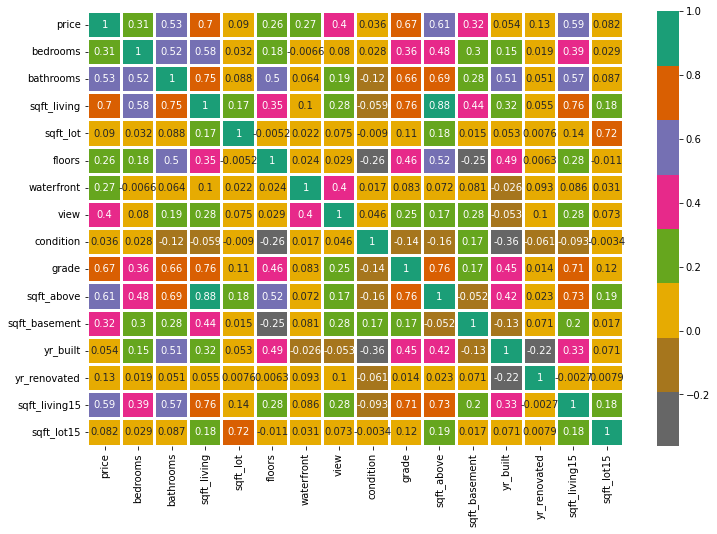

In [310]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [311]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [312]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


**Regresión Lineal**

Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [313]:
#Función Para Graficar Distribuciones
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price')
    plt.ylabel('Proportion of Houses')

    plt.show()
    plt.close()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


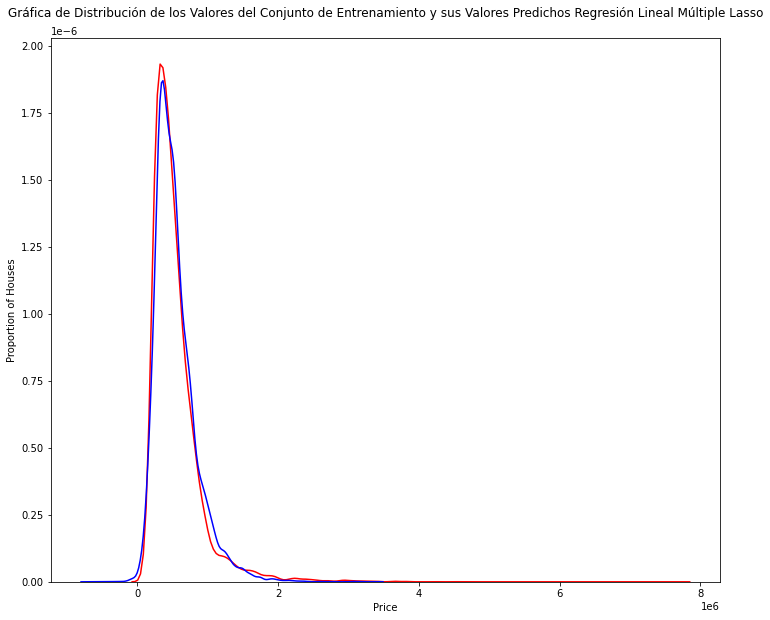

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


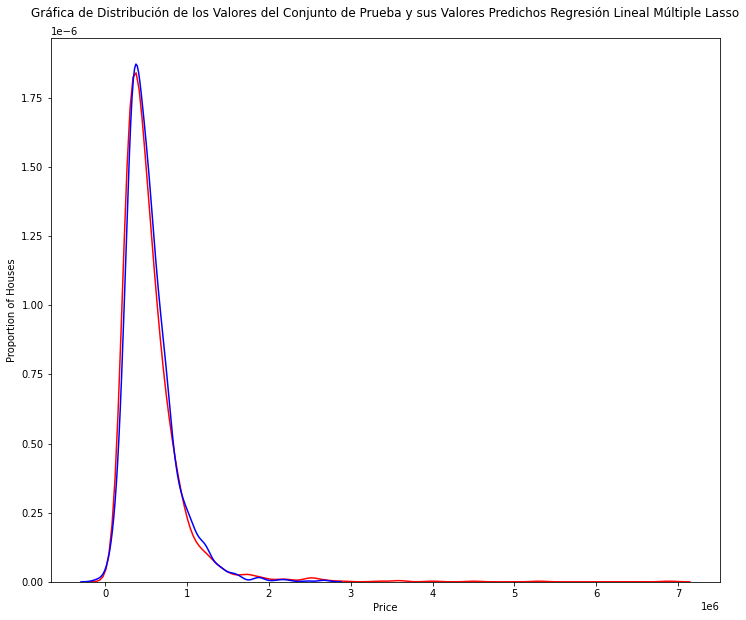

Error medio Absoluto del Conjunto de Entrenamiento es (MAE): 139269.32939116764
Root Mean Squared Error del Conjunto de Entrenamiento es: 214234.8822754647
r2_score del Conjunto de Entrenamiento es: 0.6529196653133833
Error medio Absoluto del Conjunto de Prueba es (MAE): 137480.1388273265
Root Mean Squared Error del Conjunto de Prueba es: 232133.367624069
r2_score del Conjunto de Prueba es: 0.6579723205007987


In [314]:
#Se crean listas vacías para guardar la información
nombres_modelos =[]
MAE_Modelos = []
RMSE_Modelos = []
r2_score_Modelos =[]

#Se utiliza un pipeline con un escalador estandar para traer todos los datos de entrada a valores similares
pipeRLM = Pipeline([("scaler", StandardScaler()),
                        ("RLM", LinearRegression(fit_intercept=True))])

#Se entrena el modelo
pipeRLM.fit(X_train, y_train)

#Se preciden las variables del conjunto de entrenamiento
yhat_train = pipeRLM.predict(X_train)

#Se preciden las variables del conjunto de prueba
yhat_test = pipeRLM.predict(X_test)

#Se examina la distribucion de los valores predichos del conjunto de entrenamiento
Title = 'Gráfica de Distribución de los Valores del Conjunto de Entrenamiento y sus Valores Predichos Regresión Lineal Múltiple Lasso\n'
DistributionPlot(y_train, yhat_train, "Valores Actuales (Train)", "Valores Predichos (Train)", Title)

#Se examina la distribucion de los valores predichos del conjunto de entrenamiento
Title = 'Gráfica de Distribución de los Valores del Conjunto de Prueba y sus Valores Predichos Regresión Lineal Múltiple Lasso\n'
DistributionPlot(y_test, yhat_test, "Valores Actuales (Train)", "Valores Predichos (Train)", Title)

#Se realizan las predicciones en el conjunto de entrenamiento y prueba
y_pred_train = yhat_train
y_pred_test = yhat_test

#Se calculan Métricas
MAE = mean_absolute_error(y_test, y_pred_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2score = r2_score(y_test, y_pred_test)

#Se guardan métricas de interés
nombres_modelos.append('RLM')
MAE_Modelos.append(MAE)
RMSE_Modelos.append(RMSE)
r2_score_Modelos.append(r2score)

#Se imprimen las métricas de interés

print('Error medio Absoluto del Conjunto de Entrenamiento es (MAE):', mean_absolute_error(y_train, y_pred_train))
print('Root Mean Squared Error del Conjunto de Entrenamiento es:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('r2_score del Conjunto de Entrenamiento es:',r2_score(y_train, y_pred_train))

print('Error medio Absoluto del Conjunto de Prueba es (MAE):', mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared Error del Conjunto de Prueba es:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('r2_score del Conjunto de Prueba es:',r2_score(y_test, y_pred_test))

**Regresión Polinomial Múltiple**

 la regresión polinomial completa, tu modelo generado (ecuación), sus errores y r cuadrada.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


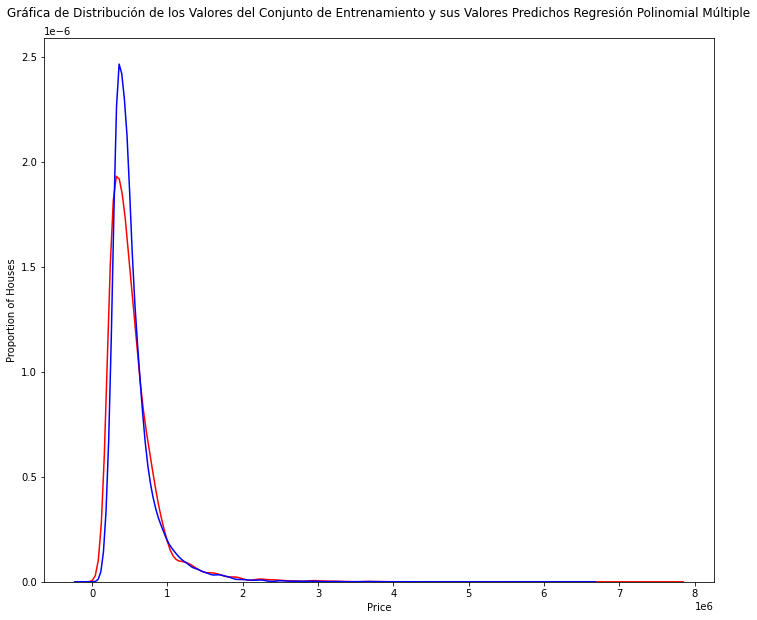

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


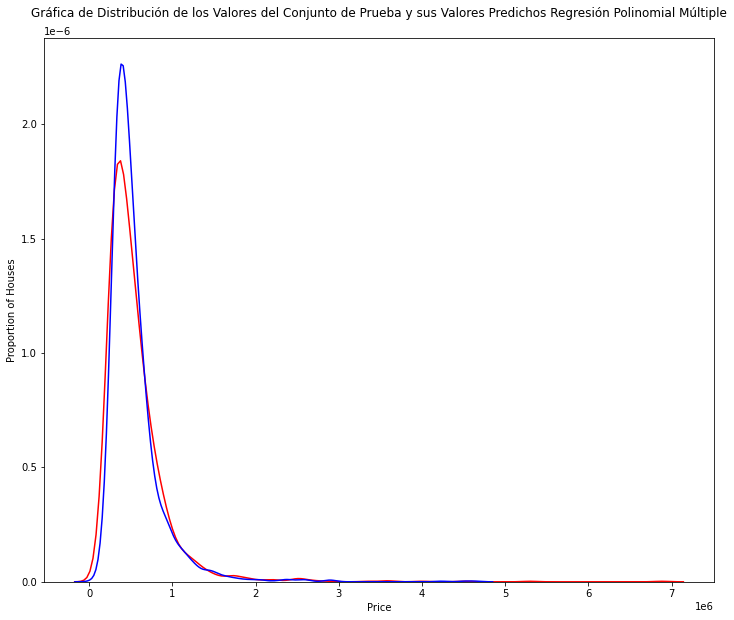

Error medio Absoluto del Conjunto de Entrenamiento es (MAE): 123186.47023490116
Root Mean Squared Error del Conjunto de Entrenamiento es: 182926.29599023084
r2_score del Conjunto de Entrenamiento es: 0.7469525773041397
Error medio Absoluto del Conjunto de Prueba es (MAE): 121316.53705155816
Root Mean Squared Error del Conjunto de Prueba es: 186279.18879629826
r2_score del Conjunto de Prueba es: 0.7797505735329586


In [315]:
#Se utiliza un pipeline con un escalador estandar para traer todos los datos de entrada a valores similares
pipePolyRLM = Pipeline([("scaler", StandardScaler()),
                    ("polynomial_features", PolynomialFeatures(degree=2, include_bias=False)),
                        ("PolyRLM", LinearRegression(fit_intercept=True))])

#Se entrena el modelo
pipePolyRLM.fit(X_train, y_train)

#Se preciden las variables del conjunto de entrenamiento
yhat_train = pipePolyRLM.predict(X_train)

#Se preciden las variables del conjunto de prueba
yhat_test = pipePolyRLM.predict(X_test)

#Se examina la distribucion de los valores predichos del conjunto de entrenamiento
Title = 'Gráfica de Distribución de los Valores del Conjunto de Entrenamiento y sus Valores Predichos Regresión Polinomial Múltiple\n'
DistributionPlot(y_train, yhat_train, "Valores Actuales (Train)", "Valores Predichos (Train)", Title)

#Se examina la distribucion de los valores predichos del conjunto de entrenamiento
Title = 'Gráfica de Distribución de los Valores del Conjunto de Prueba y sus Valores Predichos Regresión Polinomial Múltiple\n'
DistributionPlot(y_test, yhat_test, "Valores Actuales (Train)", "Valores Predichos (Train)", Title)

#Se realizan las predicciones en el conjunto de entrenamiento y prueba
y_pred_train = yhat_train
y_pred_test = yhat_test

#Se calculan Métricas
MAE = mean_absolute_error(y_test, y_pred_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2score = r2_score(y_test, y_pred_test)

#Se guardan métricas de interés
nombres_modelos.append('PolyRLM')
MAE_Modelos.append(MAE)
RMSE_Modelos.append(RMSE)
r2_score_Modelos.append(r2score)

#Se imprimen las métricas de interés

print('Error medio Absoluto del Conjunto de Entrenamiento es (MAE):', mean_absolute_error(y_train, y_pred_train))
print('Root Mean Squared Error del Conjunto de Entrenamiento es:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('r2_score del Conjunto de Entrenamiento es:',r2_score(y_train, y_pred_train))

print('Error medio Absoluto del Conjunto de Prueba es (MAE):', mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared Error del Conjunto de Prueba es:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('r2_score del Conjunto de Prueba es:',r2_score(y_test, y_pred_test))

**Realiza la regresión con Ridge y Lasso**

Incluye la ecuación de tu modelo, errores y r cuadrada.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.095e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kde

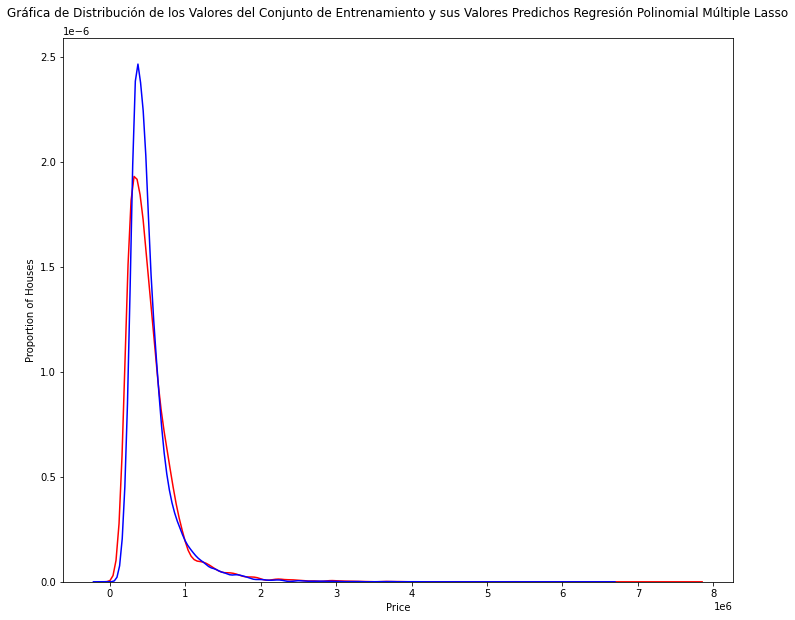

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


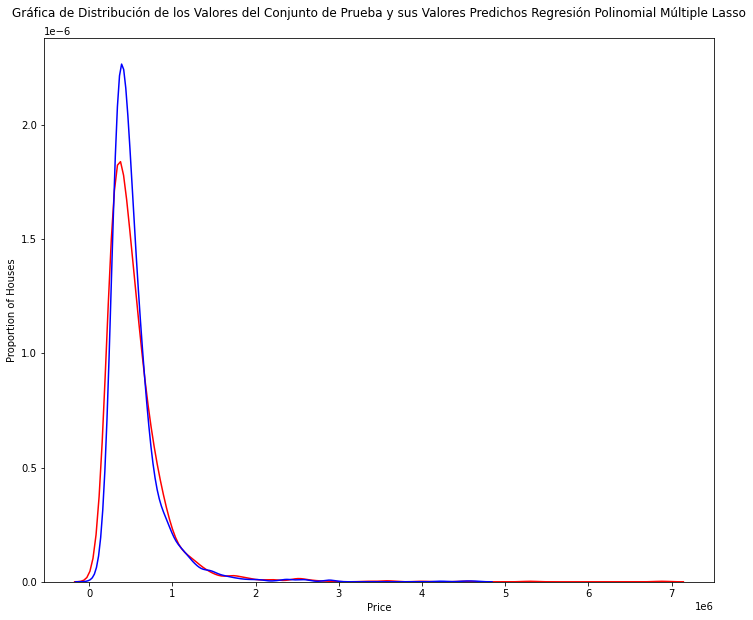

Error medio Absoluto del Conjunto de Entrenamiento es (MAE): 123243.05364152846
Root Mean Squared Error del Conjunto de Entrenamiento es: 183010.63272793705
r2_score del Conjunto de Entrenamiento es: 0.7467191924471963
Error medio Absoluto del Conjunto de Prueba es (MAE): 121339.51773386182
Root Mean Squared Error del Conjunto de Prueba es: 186407.55540263612
r2_score del Conjunto de Prueba es: 0.7794469173588271


In [316]:
#Se utiliza un pipeline con un escalador estandar para traer todos los datos de entrada a valores similares
pipePolyLasso = Pipeline([("scaler", StandardScaler()),
                    ("polynomial_features", PolynomialFeatures(degree=2, include_bias=False)),
                        ("PolyLasso", Lasso(alpha = 1))])

#Se entrena el modelo
pipePolyLasso.fit(X_train, y_train)

#Se preciden las variables del conjunto de entrenamiento
yhat_train = pipePolyLasso.predict(X_train)

#Se preciden las variables del conjunto de prueba
yhat_test = pipePolyLasso.predict(X_test)

#Se examina la distribucion de los valores predichos del conjunto de entrenamiento
Title = 'Gráfica de Distribución de los Valores del Conjunto de Entrenamiento y sus Valores Predichos Regresión Polinomial Múltiple Lasso\n'
DistributionPlot(y_train, yhat_train, "Valores Actuales (Train)", "Valores Predichos (Train)", Title)

#Se examina la distribucion de los valores predichos del conjunto de entrenamiento
Title = 'Gráfica de Distribución de los Valores del Conjunto de Prueba y sus Valores Predichos Regresión Polinomial Múltiple Lasso\n'
DistributionPlot(y_test, yhat_test, "Valores Actuales (Train)", "Valores Predichos (Train)", Title)

#Se realizan las predicciones en el conjunto de entrenamiento y prueba
y_pred_train = yhat_train
y_pred_test = yhat_test

#Se calculan Métricas
MAE = mean_absolute_error(y_test, y_pred_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2score = r2_score(y_test, y_pred_test)

#Se guardan métricas de interés
nombres_modelos.append('PolyLasso')
MAE_Modelos.append(MAE)
RMSE_Modelos.append(RMSE)
r2_score_Modelos.append(r2score)

#Se imprimen las métricas de interés

print('Error medio Absoluto del Conjunto de Entrenamiento es (MAE):', mean_absolute_error(y_train, y_pred_train))
print('Root Mean Squared Error del Conjunto de Entrenamiento es:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('r2_score del Conjunto de Entrenamiento es:',r2_score(y_train, y_pred_train))

print('Error medio Absoluto del Conjunto de Prueba es (MAE):', mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared Error del Conjunto de Prueba es:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('r2_score del Conjunto de Prueba es:',r2_score(y_test, y_pred_test))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


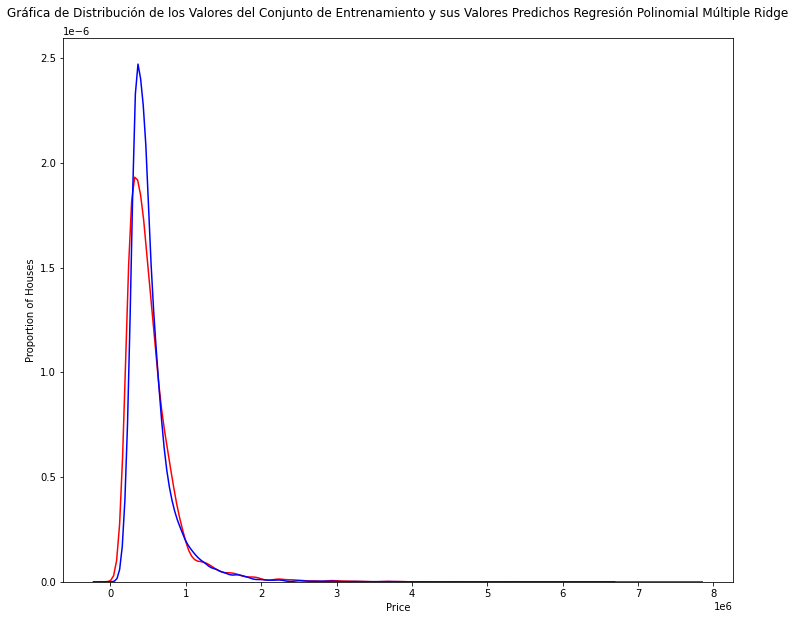

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


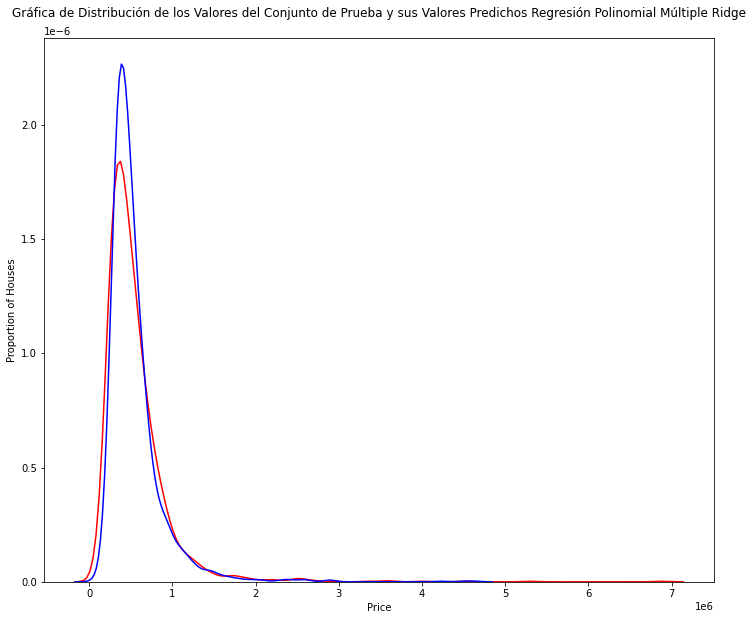

Error medio Absoluto del Conjunto de Entrenamiento es (MAE): 123200.63902065133
Root Mean Squared Error del Conjunto de Entrenamiento es: 182950.44174063683
r2_score del Conjunto de Entrenamiento es: 0.746885769816142
Error medio Absoluto del Conjunto de Prueba es (MAE): 121298.9334815776
Root Mean Squared Error del Conjunto de Prueba es: 186318.95563636447
r2_score del Conjunto de Prueba es: 0.7796565258975989


In [317]:
#Se utiliza un pipeline con un escalador estandar para traer todos los datos de entrada a valores similares
pipePolyRidge = Pipeline([("scaler", StandardScaler()),
                    ("polynomial_features", PolynomialFeatures(degree=2, include_bias=False)),
                        ("PolyRidge", Ridge(alpha = 1))])

#Se entrena el modelo
pipePolyRidge.fit(X_train, y_train)

#Se preciden las variables del conjunto de entrenamiento
yhat_train = pipePolyRidge.predict(X_train)

#Se preciden las variables del conjunto de prueba
yhat_test = pipePolyRidge.predict(X_test)

#Se examina la distribucion de los valores predichos del conjunto de entrenamiento
Title = 'Gráfica de Distribución de los Valores del Conjunto de Entrenamiento y sus Valores Predichos Regresión Polinomial Múltiple Ridge\n'
DistributionPlot(y_train, yhat_train, "Valores Actuales (Train)", "Valores Predichos (Train)", Title)

#Se examina la distribucion de los valores predichos del conjunto de entrenamiento
Title = 'Gráfica de Distribución de los Valores del Conjunto de Prueba y sus Valores Predichos Regresión Polinomial Múltiple Ridge\n'
DistributionPlot(y_test, yhat_test, "Valores Actuales (Train)", "Valores Predichos (Train)", Title)

#Se realizan las predicciones en el conjunto de entrenamiento y prueba
y_pred_train = yhat_train
y_pred_test = yhat_test

#Se calculan Métricas
MAE = mean_absolute_error(y_test, y_pred_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2score = r2_score(y_test, y_pred_test)

#Se guardan métricas de interés
nombres_modelos.append('PolyRidge')
MAE_Modelos.append(MAE)
RMSE_Modelos.append(RMSE)
r2_score_Modelos.append(r2score)

#Se imprimen las métricas de interés

print('Error medio Absoluto del Conjunto de Entrenamiento es (MAE):', mean_absolute_error(y_train, y_pred_train))
print('Root Mean Squared Error del Conjunto de Entrenamiento es:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('r2_score del Conjunto de Entrenamiento es:',r2_score(y_train, y_pred_train))

print('Error medio Absoluto del Conjunto de Prueba es (MAE):', mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared Error del Conjunto de Prueba es:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('r2_score del Conjunto de Prueba es:',r2_score(y_test, y_pred_test))

**Se grafican métricas**

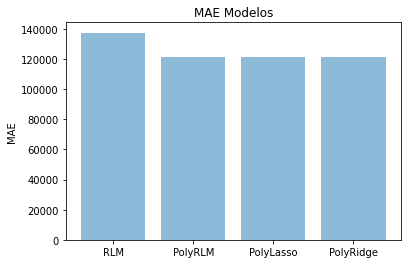

In [318]:
objects = nombres_modelos
y_pos = np.arange(len(objects))
performance = MAE_Modelos

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('MAE')
plt.title('MAE Modelos')

plt.show()

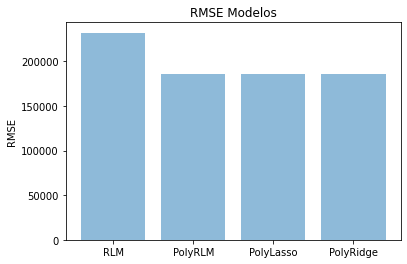

In [319]:
objects = nombres_modelos
y_pos = np.arange(len(objects))
performance = RMSE_Modelos

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('RMSE')
plt.title('RMSE Modelos')

plt.show()

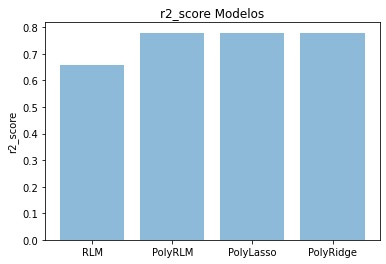

In [320]:
objects = nombres_modelos
y_pos = np.arange(len(objects))
performance = r2_score_Modelos

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('r2_score')
plt.title('r2_score Modelos')

plt.show()

**Explica tus resultados**

***¿que método conviene más a la empresa? ¿por que?***

Todos los métodos que incluyen una regresión polinomial de grado 2 convergen a valores muy similares en todas las métricas de error y de r2_score, por lo que cualquiera de ellos (Polinomial, Lasso o Ridge), convienen de igual manera como mejor método.

***¿que porcentajes de entrenamiento y evaluación usaste?***

Se utilizó un porcenaje de entrenamiento del 90% y 10% para validación, los cuales corresponden a los valores predefinidos para el ejercicio y corresponden a valores comunes que se usan para ejercicios de modelado y validación.

***¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?***

Todos los ejercicios de regresión polinomiales resultan en un valor de r2_score 0.78, el cual es bastante bueno tomando en cuenta que se tiene un modelo con múltiples predictores. Idealmente se desean valores por encima de 0.8, pero para una primera aproximación, se tiene una correlación bastante buena. Las demás métricas de error son muy similares para todos.

***Conclusiones:***

De forma similar que en el ejercicio anterior, se logró entender y aplicar los métodos de regresión lineal múltiple para un caso con múltiples predictores. Se reforzó también el concepto de un mejor ajuste haciendo el uso de transformaciones polinomiales y las ventajas de emplear métricas de penalización para evitar el sobreentrenamiento.